# Assignment 4 - Landon Burleson

## Problem 1 - Naive Bayes 

The following is the calculations used to find the conditional probability for the all features in
the table data set.

These are the prior probabilities to be used in determining the final prediction:

$$P(apartment) = 7 / 20 = 0.35$$
$$P(condo) = 6 / 20 = 0.30$$
$$P(house) = 7 / 20 = 0.35$$

To find the conditional probability of the continuous values, the following Gaussian Naive Bayes
formula is used: 

$$P(X | C = c_i) = \frac{1}{\sqrt{2\pi}\sigma} \exp{(-\frac{(c_i - \mu)^2}{2\sigma^2})}$$

Finding the variance and mean of the local price values for the three categories is given as the
following: 

$$\mu_{apartment(local\_price)} = \frac{(4.92 + 4.56 + 5.06 + 14.46 + 5.05 + 8.25 + 9.04)}{7} = 7.33$$
$$\mu_{condo(local\_price)} = \frac{(4.54 + 3.89 + 5.90 + 16.42 + 5.96 + 7.78)}{6} = 7.415$$
$$\mu_{house(local\_price)} = \frac{(5.02 + 5.60 + 5.83 + 5.30 + 6.27 + 5.60 + 6.70)}{7}  = 5.76 $$

Variance for the local price is found with the following formula:
$$\sigma^2 = \frac{1}{N}\sum_{i=1}^N (X_i - \mu)^2$$

$$\sigma^{2}_{apartment(local\_price)} = \frac{1}{7}\sum_{i=1}^7 (X_i - 7.33)^2 = 13.0754$$
$$\sigma^{2}_{condo(local\_price)} = \frac{1}{6}\sum_{i=1}^6 (X_i - 7.415)^2 = 21.2636$$
$$\sigma^{2}_{house(local\_price)} = \frac{1}{7}\sum_{i=1}^7 (X_i - 5.76)^2 = 0.3250$$

The following table shows the mean and variance for the apartment category:

### Apartment Category Statistics

|            | local price | Bathrooms | Land Area | Living Area | Garages | # Rooms | # Bedrooms | Age      |
|------------|-------------|-----------|-----------|-------------|---------|---------|------------|----------|
| $\mu$      | 7.3327      | 1.2857    | 6.1038    | 1.5050      | 1.2142  | 6.8571  | 3.4285     | 38.7142  |
| $\sigma^2$ | 13.0754     | 0.3214    | 10.6178   | 0.4957      | 0.4880  | 1.8095  | 0.9523     | 215.5714 |


### Condo Category Statistics
|            | local price | Bathrooms | Land Area | Living Area | Garages | # Rooms | # Bedrooms | Age      |
|------------|-------------|-----------|-----------|-------------|---------|---------|------------|----------|
| $\mu$      | 7.4159      | 1.3333    | 6.0246    | 1.5533      | 1.3333  | 6.8333  | 3.3333     | 39.6667  |
| $\sigma^2$ | 21.2636     | 0.3666    | 6.4758    | 0.8527      | 0.2666  | 2.5666  | 0.6667     | 194.6667 |

### House Category Statistics
|            | local price | Bathrooms | Land Area | Living Area | Garages | # Rooms | # Bedrooms | Age      |
|------------|-------------|-----------|-----------|-------------|---------|---------|------------|----------|
| $\mu$      | 5.7607      | 1.0714    | 6.6309    | 1.3917      | 1.0714  | 6.1428  | 3.0000     | 34.2857  |
| $\sigma^2$ | 0.3250      | 0.0357    | 5.0578    | 0.0453      | 0.7023  | 0.4761  | 0.3333     | 161.9047 |

Utilizing the above statistics, we can make a prediction using the MAP operation based on the greatest probability for each category:

$$P(apartment|X) = P(apartment) * P(apartment | local price = x_i) * P(apartment | Bathrooms = x_i) * P(apartment | land area = x_i) * P(apartment | Living Area = x_i) * P(apartment | Garages = x_i) * P(apartment | Rooms
= x_i) * P(apartment | Bedrooms = x_i) * P(apartment | Age = x_i)$$ 

$$P(condo|X) = P(condo) * P(condo | local price = x_i) * P(condo | Bathrooms = x_i) * P(condo | land
area = x_i) * P(condo | Living Area = x_i) * P(condo | Garages = x_i) * P(condo | Rooms = x_i) *
P(condo | Bedrooms = x_i) * P(condo | Age = x_i)$$ 

$$P(house|X) = P(house) * P(house | local price = x_i) * P(house | Bathrooms = x_i) * P(house | land
area = x_i) * P(house | Living Area = x_i) * P(house | Garages = x_i) * P(house | Rooms = x_i) *
P(house | Bedrooms = x_i) * P(house | Age = x_i)$$ 

$$MAX(P(apartment|X), P(condo|X), P(house|X))$$

In [104]:
!git clone https://github.com/lrburle/ML_Assignment4.git

fatal: destination path 'ML_Assignment4' already exists and is not an empty directory.


In [105]:
#Adding in the necessary modules needed to complete Assignment 4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [106]:
def readExcel():
	train = pd.read_excel('./ML_Assignment4/Asssignment4_Data.xlsx', sheet_name='Train', index_col = 0)
	test = pd.read_excel('./ML_Assignment4/Asssignment4_Data.xlsx', sheet_name='Test', index_col = 0)
	return train, test

def naiveBayesGauss(val, mean, variance):
	return (1 / (np.sqrt(2 * np.pi * variance))) * np.exp(-((val - mean)**2 / (2*variance)))

train, test = readExcel()

#Prior Probabilities
prior = {'House' : 7/20, 
        'Condo' : 7/20, 
        'Apartment' : 6/20}

#The following dictionaries are used for the conditional probability value calculations .
house_mean = {'Local Price' : 5.760742857, 	
         'Bathrooms' : 1.071428571,
         'Land Area' : 6.6309,
         'Living area' : 1.391714286,
         '# Garages' : 1.071428571,
         '# Rooms' : 6.142857143,
         '# Bedrooms' : 3.0000,
         'Age of home' : 34.28571429}

house_var = {'Local Price' : 0.325038263,
         'Bathrooms' : 0.035714286,
         'Land Area' : 5.057880537,
         'Living area' : 0.045336571,
         '# Garages' : 0.702380952,
         '# Rooms' : 0.476190476,
         '# Bedrooms' : 0.333333333,
         'Age of home' : 161.9047619}

condo_mean = {'Local Price' : 7.4159,
         'Bathrooms' : 1.333333333,
         'Land Area' : 6.024666667,
         'Living area' : 1.553333333,
         '# Garages' : 1.333333333,
         '# Rooms' : 6.833333333,
         '# Bedrooms' : 3.333333333,
         'Age of home' : 39.66666667}

condo_var = {'Local Price' : 21.26360681,
         'Bathrooms' : 0.366666667,
         'Land Area' : 6.475891867,
         'Living area' : 0.852743867,
         '# Garages' : 0.266666667,
         '# Rooms' : 2.566666667,
         '# Bedrooms' : 0.666666667,
         'Age of home' : 194.6666667}

apt_mean = {'Local Price' : 7.332742857,
         'Bathrooms' : 1.285714286,
         'Land Area' : 6.103857143,
         'Living area' : 1.505,
         '# Garages' : 1.214285714,
         '# Rooms' : 6.857142857,
         '# Bedrooms' :  3.428571429,
         'Age of home' : 38.71428571}

apt_var = {'Local Price' : 13.07543601,
         'Bathrooms' : 0.321428571,
         'Land Area' : 10.61788414,
         'Living area' : 0.495765,
         '# Garages' :  0.488095238,
         '# Rooms' :  1.80952381,
         '# Bedrooms' : 0.952380952,
         'Age of home' : 215.5714286}

In [107]:
# This section of code cycles through all features available in the excel spreadsheet to make predictions. 
categories = ['House', 'Condo', 'Apartment']
actual = [2, 0, 0, 2, 2]
column_names = test.columns
MAP = []
values = test.to_numpy()

for i in range(test.shape[0]): #Cycle through test samples
    prob_i = np.ones(3)
    for idx, j in enumerate(categories):
        p = prior[j]
        for k in range(test.shape[1]-1): #Cycle through the test features
            if j == 'House':
                x = values[i, k]
                mu = house_mean[test.columns[k]]
                sigma = house_var[test.columns[k]]
                gauss = naiveBayesGauss(x, mu, sigma)
                print(f'P(House | {test.columns[k]} = {values[i,k]}) = {gauss}, value = {x}, mu = {mu}, sigma^2 = {sigma}')
                prob_i[idx] = (prob_i[idx]*gauss)
            if j == 'Condo':
                x = values[i, k]
                mu = condo_mean[test.columns[k]]
                sigma = condo_var[test.columns[k]]
                gauss = naiveBayesGauss(x, mu, sigma)
                print(f'P(Condo | {test.columns[k]} = {values[i,k]}) = {gauss}, value = {x}, mu = {mu}, sigma^2 = {sigma}')
                prob_i[idx] = (prob_i[idx]*gauss)
            if j == 'Apartment':
                x = values[i,k]
                mu = apt_mean[test.columns[k]]
                sigma = apt_var[test.columns[k]]
                gauss = naiveBayesGauss(x, mu, sigma)
                print(f'P(Apartment | {test.columns[k]} = {values[i,k]}) = {gauss}, value = {x}, mu = {mu}, sigma^2 = {sigma}')
                prob_i[idx] = (prob_i[idx]*naiveBayesGauss(x, mu, sigma))
        print(f"Final probability guess for (P({j} | X_{i})) : {p} * {prob_i[idx]} = {p * prob_i[idx]}")
        prob_i[idx] = prob_i[idx] * p #likelihood probability 
    print(f'Final probabilities for test sample {i}:\n{prob_i} = {categories}')
    print()
    print()
    MAP.append(np.argmax(prob_i)) #Selects the highest probability of a class for a given sample.

predictions = []

for i in MAP:
    predictions.append(categories[i])    

print(MAP)
print(predictions)
print(f'Accuracy = {(sum(1 for x,y in zip(MAP, actual) if x == y) / len(predictions)) * 100}%')

P(House | Local Price = 6.0931) = 0.5904013266845917, value = 6.0931, mu = 5.760742857, sigma^2 = 0.325038263
P(House | Bathrooms = 1.5) = 0.16133620877335988, value = 1.5, mu = 1.071428571, sigma^2 = 0.035714286
P(House | Land Area = 6.7265) = 0.17722843680066008, value = 6.7265, mu = 6.6309, sigma^2 = 5.057880537
P(House | Living area = 1.652) = 0.8875483080848824, value = 1.652, mu = 1.391714286, sigma^2 = 0.045336571
P(House | # Garages = 1.0) = 0.47429261492971525, value = 1.0, mu = 1.071428571, sigma^2 = 0.702380952
P(House | # Rooms = 6) = 0.5658657429865924, value = 6, mu = 6.142857143, sigma^2 = 0.476190476
P(House | # Bedrooms = 3) = 0.6909882992881651, value = 3, mu = 3.0, sigma^2 = 0.333333333
P(House | Age of home = 44) = 0.023426878995713447, value = 44, mu = 34.28571429, sigma^2 = 161.9047619
Final probability guess for (P(House | X_0)) : 0.35 * 6.509527595875534e-05 = 2.2783346585564368e-05
P(Condo | Local Price = 6.0931) = 0.08302757866064137, value = 6.0931, mu = 7.41

In [108]:
# This section of code only uses the local price and age of home features to make a prediction.
categories = ['House', 'Condo', 'Apartment']
column_names = test.columns
MAP = []
values = test.to_numpy()

features = [0, 7] #local price, age of home

for i in range(test.shape[0]): #Cycle through test samples
    prob_i = np.ones(3)
    for idx, j in enumerate(categories):
        p = prior[j]
        for k in features: #Cycle through the test features
            if j == 'House':
                x = values[i, k]
                mu = house_mean[test.columns[k]]
                sigma = house_var[test.columns[k]]
                gauss = naiveBayesGauss(x, mu, sigma)
                print(f'P(House | {test.columns[k]} = {values[i,k]}) = {gauss}, value = {x}, mu = {mu}, sigma^2 = {sigma}')
                prob_i[idx] = (prob_i[idx]*gauss)
            if j == 'Condo':
                x = values[i, k]
                mu = condo_mean[test.columns[k]]
                sigma = condo_var[test.columns[k]]
                gauss = naiveBayesGauss(x, mu, sigma)
                print(f'P(Condo | {test.columns[k]} = {values[i,k]}) = {gauss}, value = {x}, mu = {mu}, sigma^2 = {sigma}')
                prob_i[idx] = (prob_i[idx]*gauss)
            if j == 'Apartment':
                x = values[i,k]
                mu = apt_mean[test.columns[k]]
                sigma = apt_var[test.columns[k]]
                gauss = naiveBayesGauss(x, mu, sigma)
                print(f'P(Apartment | {test.columns[k]} = {values[i,k]}) = {gauss}, value = {x}, mu = {mu}, sigma^2 = {sigma}')
                prob_i[idx] = (prob_i[idx]*naiveBayesGauss(x, mu, sigma))
        print(f"Final probability guess for (P({j} | X_{i})) : {p} * {prob_i[idx]} = {p * prob_i[idx]}")
        prob_i[idx] = prob_i[idx] * p #likelihood probability 
    print(f'Final probabilities for test sample {i}:\n{prob_i} = {categories}')
    print()
    print()
    MAP.append(np.argmax(prob_i)) #Selects the highest probability of a class for a given sample.

predictions = []

for i in MAP:
    predictions.append(categories[i])    
print(MAP)
print(predictions)
print(f'Accuracy = {(sum(1 for x,y in zip(MAP, actual) if x == y) / len(predictions)) * 100}%')

P(House | Local Price = 6.0931) = 0.5904013266845917, value = 6.0931, mu = 5.760742857, sigma^2 = 0.325038263
P(House | Age of home = 44) = 0.023426878995713447, value = 44, mu = 34.28571429, sigma^2 = 161.9047619
Final probability guess for (P(House | X_0)) : 0.35 * 0.013831260439148613 = 0.004840941153702014
P(Condo | Local Price = 6.0931) = 0.08302757866064137, value = 6.0931, mu = 7.4159, sigma^2 = 21.26360681
P(Condo | Age of home = 44) = 0.02724695590843211, value = 44, mu = 39.66666667, sigma^2 = 194.6666667
Final probability guess for (P(Condo | X_0)) : 0.35 * 0.002262248774950374 = 0.0007917870712326309
P(Apartment | Local Price = 6.0931) = 0.10403065940980438, value = 6.0931, mu = 7.332742857, sigma^2 = 13.07543601
P(Apartment | Age of home = 44) = 0.025466628901175122, value = 44, mu = 38.71428571, sigma^2 = 215.5714286
Final probability guess for (P(Apartment | X_0)) : 0.3 * 0.00264931019753403 = 0.0007947930592602091
Final probabilities for test sample 0:
[0.00484094 0.000

Due to the closeness of the variance and mean values, the accuracy that can be achieved from the data collected in the variance and mean tables to calculate the conditional probability of the sample value using the Gaussian Naive Bayes based algorithm yields poor results for this particular data set. The best accuracy that can be achieved using the Naive Bayes based approach is 20% using only the local price and age of the home. 

## Problem 2 - Decision Trees


In [109]:
# Gather dataset for training the decision tree. 
feature_cols = ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']

X_train = train[feature_cols] # Features
Y_train = train['Construction type'] #Target variable

# Create test samples.
X_test = test[feature_cols]
Y_test = test['Construction type']

In [110]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train.values , Y_train.values)

train_accuracy = clf.score(X_train.values , Y_train.values)

Y_pred = []
for i in range(X_test.shape[0]):
	Y_pred.append(clf.predict(X_test.values[i].reshape(1, -1))) 

print(f'Accuracy on Training: {train_accuracy * 100}%')
print(f'Accuracy on Testing: {metrics.accuracy_score(Y_test.values.reshape(-1,1), Y_pred) * 100}%')


Accuracy on Training: 100.0%
Accuracy on Testing: 40.0%


Accuracy on Training @ a depth of 1: 55.00000000000001%
Accuracy on Testing @ a depth of 1: 0.4%
Accuracy on Training @ a depth of 2: 75.0%
Accuracy on Testing @ a depth of 2: 0.6%
Accuracy on Training @ a depth of 3: 90.0%
Accuracy on Testing @ a depth of 3: 0.4%
Accuracy on Training @ a depth of 4: 95.0%
Accuracy on Testing @ a depth of 4: 0.4%
Accuracy on Training @ a depth of 5: 100.0%
Accuracy on Testing @ a depth of 5: 0.4%


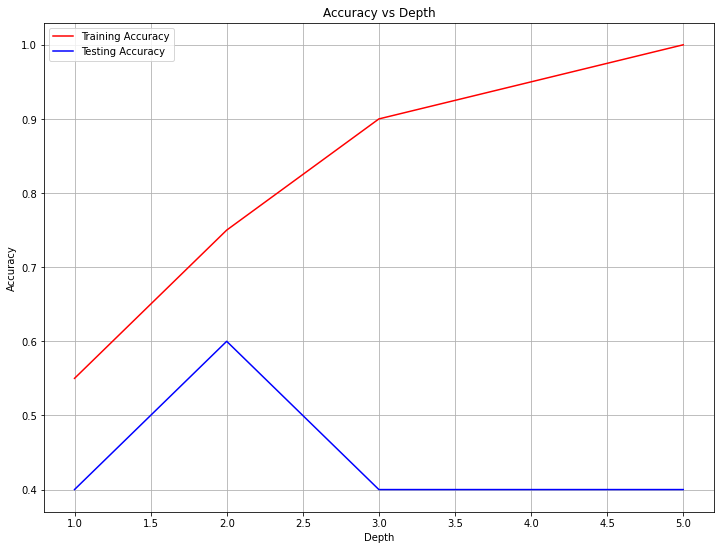

In [111]:

depth = [1, 2, 3, 4, 5]
train_accuracy = []
test_accuracy = []

for d in depth:
	clf = tree.DecisionTreeClassifier(max_depth=d)
	clf = clf.fit(X_train.values , Y_train.values)

	train_accuracy.append(clf.score(X_train.values , Y_train.values))

	Y_pred = []
	for i in range(X_test.shape[0]):
		Y_pred.append(clf.predict(X_test.values[i].reshape(1, -1))) 

	test_accuracy.append(metrics.accuracy_score(Y_test.values.reshape(-1,1), Y_pred))

	print(f'Accuracy on Training @ a depth of {d}: {train_accuracy[-1] * 100}%')
	print(f'Accuracy on Testing @ a depth of {d}: {test_accuracy[-1]}%')

plt.figure(figsize=[12, 9])
plt.title("Accuracy vs Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.plot(depth, train_accuracy, 'r', label="Training Accuracy") 
plt.plot(depth, test_accuracy, 'b', label="Testing Accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy on Training @ a depth of 2: 75.0%
Accuracy on Testing @ a depth of 2: 0.8%
|--- feature_7 <= 36.00
|   |--- feature_0 <= 8.41
|   |   |--- class: House
|   |--- feature_0 >  8.41
|   |   |--- class: Apartment
|--- feature_7 >  36.00
|   |--- feature_0 <= 4.55
|   |   |--- class: Condo
|   |--- feature_0 >  4.55
|   |   |--- class: Apartment



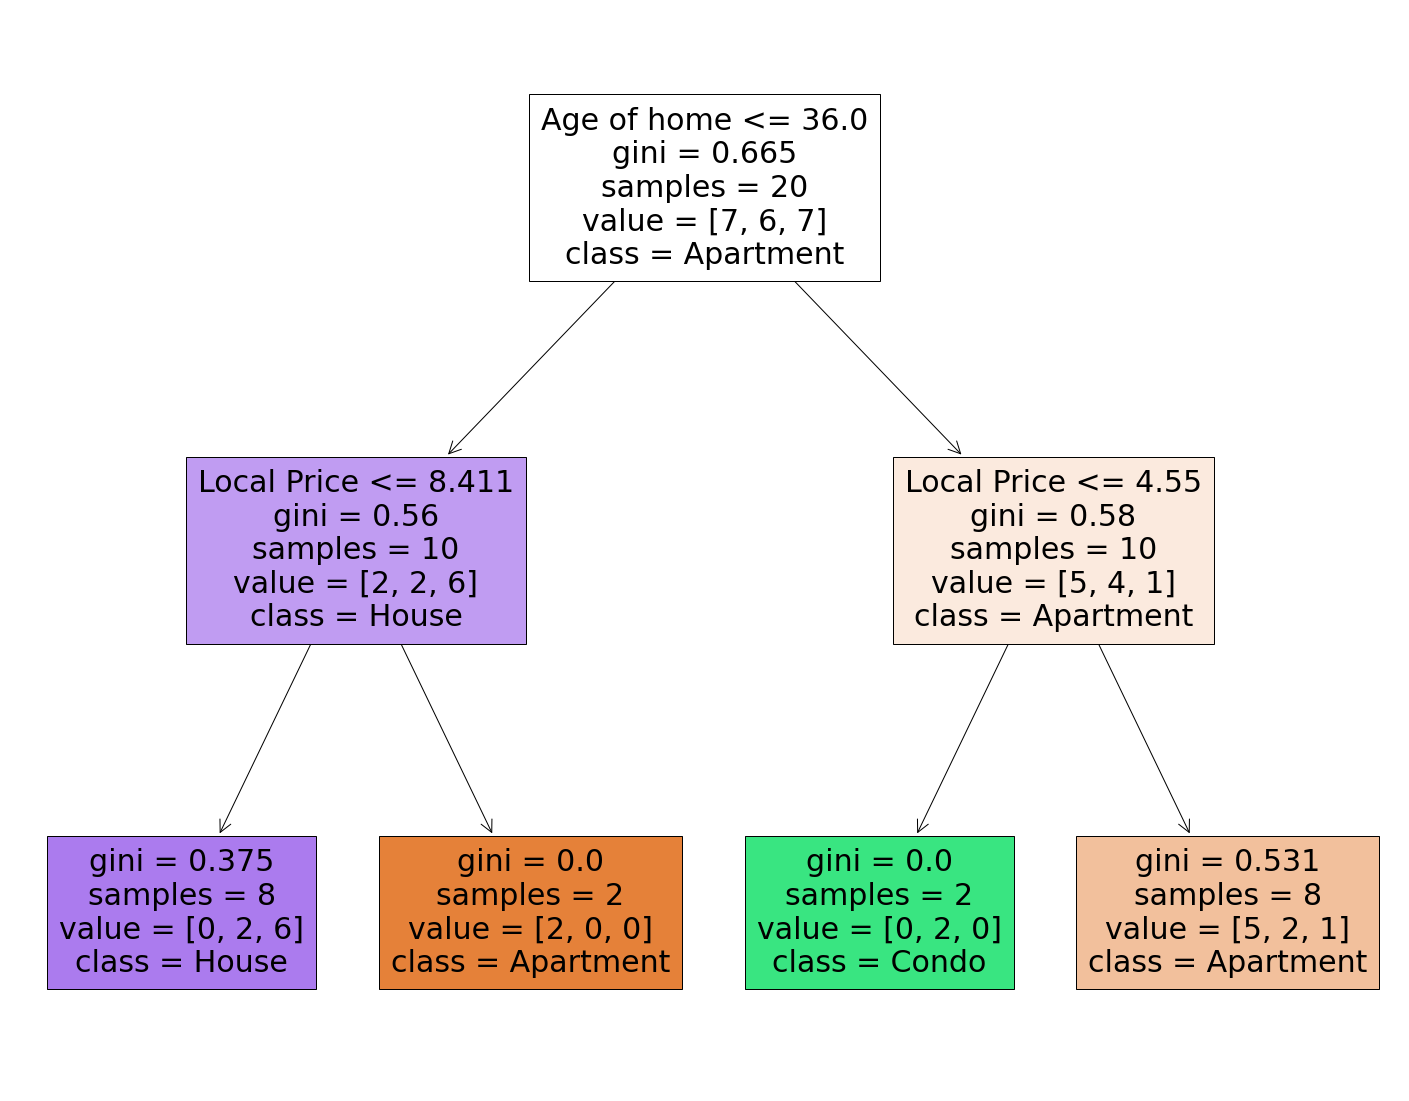

In [112]:
depth = 2
train_accuracy = []
test_accuracy = []

clf = tree.DecisionTreeClassifier(max_depth=depth)
model = clf.fit(X_train.values , Y_train.values)

train_accuracy.append(clf.score(X_train.values , Y_train.values))

Y_pred = []
for i in range(X_test.shape[0]):
    Y_pred.append(clf.predict(X_test.values[i].reshape(1, -1))) 

test_accuracy.append(metrics.accuracy_score(Y_test.values.reshape(-1,1), Y_pred))

print(f'Accuracy on Training @ a depth of {depth}: {train_accuracy[-1] * 100}%')
print(f'Accuracy on Testing @ a depth of {depth}: {test_accuracy[-1]}%')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['Apartment', 'Condo', 'House'],
                   filled=True)
fig.savefig('tree.png')

txt = tree.export_text(clf)
print(txt)

### Problem 2 - Responses
1. The following are the responses to the default parameter questions: 
	1.  The accuracy on the **training** set is 100% in accordance to the values found above. This is due
	to decision trees always over-fitting to the data if the depth is not limited appropriately. 
   2.  The accuracy on the **test** data set is 40% according to the above value found. 
2. Restricting the depth of the tree will yield better results in terms of the testing data-set as
   we will be able to generalize the data more effectively and reduce the chance of the model
   over-fitting to the data. The best depth that was used was a depth of 2. This seemed to produce
   the best accuracy for the testing dataset with a reduced accuracy to the training data. 
3. The reason restricting the depth effects the classifier performance so much is due to the fact
   that without reducing the tree depth, the model will become over-fitted to the training data set
   and thus will not generalize appropriately based upon the test data set. This will cause the test
   data set to plateau at a certain level of accuracy.
4. Shown above is the graph of the tree classifier with a max depth set to 2. See the following
   graph to perform the inference with the provided test vector (also shown below) the final
   prediction for using the decision tree manually is **Apartment**. 

|Feature Name| Value       |
|------------|-------------|
| Local Price | 9.0384 |
|Bathrooms |1 |
| Land Area |7.8| 
|Living area |1.5 |
|# Garages |1.5| 
|# Rooms| 7| 
|# Bedrooms| 3|
|Age of Home| 23|

![TREE](https://github.com/lrburle/ML_Assignment4/blob/master/tree_annotated.jpeg?raw=1)

***

## Problem 3
See the following code for the KNN implementation

In [113]:
#Functions for the KNN algorithm
def euclidian(p1, p2):
	return np.linalg.norm(p1 - p2)

def KNN(query, data, k):
	dist = []

	for idx, row in enumerate(data):
		d = euclidian(query[:-1], row[:-1])

		dist.append((d, idx))

	# Sort in the Ascending order
	dist.sort()

	# Select the k nearest neighbors
	dist_sorted = dist[:k]

	# Using the indices in the dist matrix, we can predict what the most likely category the query
	# is.
	neighbors = []

	for d in dist_sorted:
		neighbors.append(data[d[1], -1])
	
	for neighbor in neighbors:
		if query[-1] in neighbor: #Sees if the accurate category is present in the neighbors. If it is, prediction is correct.
			prediction = 1
			break
		else:
			prediction = 0  # If the category is never found amongst the neighbors, the prediction has failed to find the correct category. 

	return dist, neighbors, prediction

Accuracy = [(1, 0.2), (2, 0.2), (3, 0.4), (4, 0.4), (5, 0.6)]


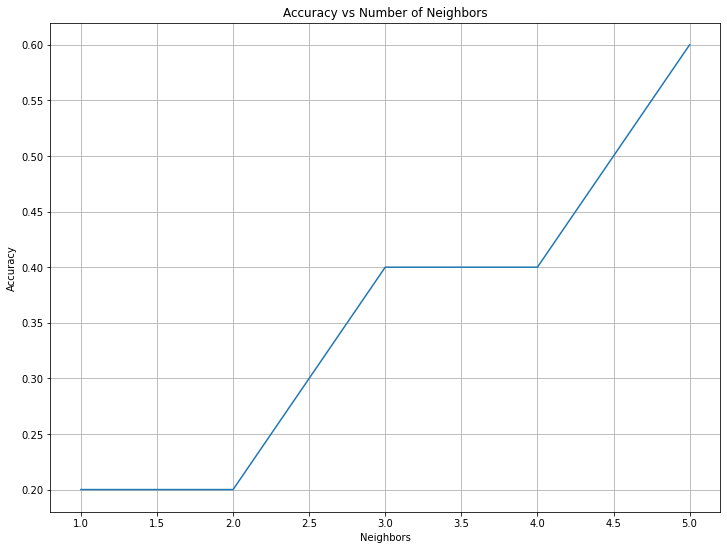

In [114]:
k = [1, 2, 3, 4, 5]
data = train.values
queries = test.values
accuracy = []

for k_c in k:
	predictions = []
	for query in queries:
		distance, neighbors, prediction= KNN(query, data, k_c)
		predictions.append(prediction)

	accuracy.append((k_c, sum(predictions) / len(predictions)))  

x = []
acc = []

for i in accuracy:
	x.append(i[0])
	acc.append(i[1])

print(f'Accuracy = {accuracy}')

plt.figure(figsize=[12, 9])
plt.title("Accuracy vs Number of Neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.plot(x, acc)
plt.grid()
plt.show()


### Problem 3 - Response
The above graph showcases the increase in accuracy as the number of neighbors (k) is increased with
the KNN network. The reason for the shape of the graph is directly due to the noisy nature of the
test data versus the training data. The inclusion of the various features or columns seemed to skew
the performance of the KNN architecture. Removing columns that do not have much variance between the
three categories seem to be a great solution to provide a more accurate prediction rate within a
lower amount of neighbors chosen. 